# Линейная регрессия

В этом ноутбуке мы научимся применять модель линейной регрессии для решения задачи регрессии. Мы будем использовать датасет с информацией о пингвинах. 

В первой части ноутбука мы применим линейную регрессию для предсказания длины плавника пингвина по массе его тела. Мы построим линейную регрессию, визуализируем ее решающую поверхность и ошибки модели на элементах датасета.

Во второй части ноутбука мы применим линейную регрессию для предсказания массы тела пингвина по всем его другим характеристикам. 

Начнем с импорта библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка датасета

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>
source: @allison_horst https://github.com/allisonhorst/penguins

### Загрузка и визуализация данных

Загрузим датасет пингвинов. Ссылка на скачивание датасета: [датасет](https://drive.google.com/file/d/14Emlklqtb74YUPllzwTSTWwcIy8NbQXo/view?usp=sharing)

In [2]:
data = pd.read_csv('penguins_size.csv')
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
data = data[data['sex'].notna()]

In [4]:
data.loc[data['species'] == 'Adelie', "species"] = 0
data.loc[data['species'] == 'Chinstrap', "species"] = 1
data.loc[data['species'] == 'Gentoo', "species"] = 2

In [5]:
data.loc[data['island'] == 'Biscoe', 'island'] = 0
data.loc[data['island'] == 'Dream', 'island'] = 1
data.loc[data['island'] == 'Torgersen', 'island'] = 2

In [6]:
data.loc[data['sex'] == 'MALE', 'sex'] = 1
data.loc[data['sex'] == 'FEMALE', 'sex'] = 0

In [7]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [68]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:	
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





## Задача 1. Предсказание длины плавника по массе тела

Создадим новый датафрейм, в котором будет две колонки из данных: масса тела и длина плавника. Разобьем его на две переменные X и y. Мы будем решать задачу предсказания длины плавника пингвина по массе его тела, поэтому признаком Х будет масса тела, а признаком y — длина плавника.

In [74]:
X = data[['body_mass_g']]
y = data['flipper_length_mm']

In [75]:
X

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0
...,...
338,4925.0
340,4850.0
341,5750.0
342,5200.0


Разобьем выборку на тренировочную и тестовую:

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные на плоскости:

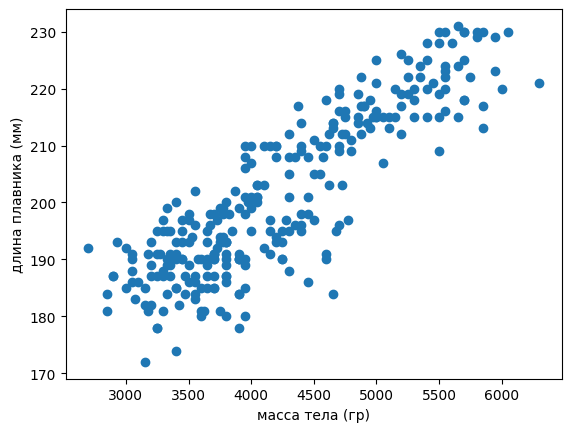

In [77]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('масса тела (гр)')
plt.ylabel('длина плавника (мм)')

plt.show()

Обучим модель линейной регрессии. Модель будет учиться предсказывать величину y (длину плавника) по величине X (массе тела).

Мы будем использовать линейную регрессию из библиотеки sklearn. Вот ссылка на ее докумнтацию: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
from sklearn.linear_model import LinearRegression

In [79]:
# заводим модель линейной регрессии
lr = LinearRegression()

# обучим линейную регрессию
lr.fit(X_train, y_train)

LinearRegression()

Выведем значения коэффициентов линейной регрессии. 
- lr.coef_ — коэффициент, соответствующий признаку X ($k_1$), 
- lr.intercept_ — свободный член ($k_0$).

In [80]:
lr.coef_, lr.intercept_

(array([0.01520739]), 136.97902729586025)

Визуализируем данные и прямую, которую выражает модель. 

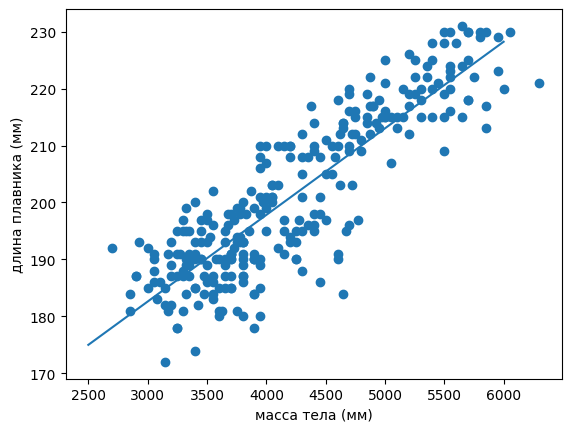

In [81]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = k_1*x_1 + k_0
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x = [2500, 6000]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Теперь визуализируем точки тестовой выборки и прямую, которую выражает модель:

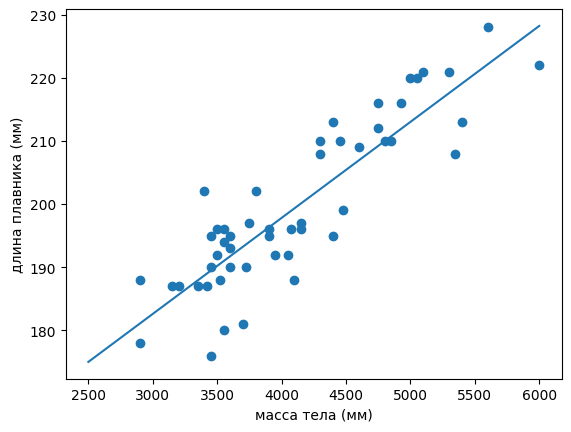

In [82]:
# визуализируем точки тестовой выборки
plt.scatter(X_test, y_test)

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Получим предсказания линейной регрессии на тренировочной и тестовой выборках:

In [83]:
# предсказание линейной регрессии для элементов тренировочной выборки
y_train_predicted = lr.predict(X_train)
# предсказание линейной регрессии для элементов тестовой выборки
y_test_predicted = lr.predict(X_test)

In [84]:
np.array(y_test)

array([222., 213., 221., 196., 202., 213., 220., 187., 195., 190., 228.,
       196., 181., 208., 209., 195., 210., 216., 199., 187., 195., 210.,
       216., 180., 190., 196., 210., 220., 192., 178., 176., 208., 196.,
       197., 188., 195., 188., 193., 194., 210., 188., 202., 212., 192.,
       190., 192., 187., 197., 187., 221., 196.])

In [85]:
np.array(y_test_predicted)

array([228.22334679, 219.09891484, 217.57817618, 198.94912762,
       194.76709631, 203.89152826, 213.77632953, 185.64266436,
       196.28783497, 193.62654231, 222.14039215, 196.28783497,
       193.24635765, 202.3707896 , 206.93300557, 191.72561899,
       204.65189759, 211.87540621, 205.03208225, 189.06432634,
       203.89152826, 209.97448289, 209.21411356, 190.96524966,
       189.444511  , 200.08968161, 202.3707896 , 213.01596021,
       190.20488033, 181.08044838, 189.444511  , 218.33854551,
       190.96524966, 194.00672698, 181.08044838, 189.444511  ,
       190.585065  , 191.72561899, 190.96524966, 210.73485222,
       199.32931228, 188.68414167, 209.21411356, 197.04820429,
       191.72561899, 198.56894295, 187.92377235, 200.08968161,
       184.88229503, 214.53669886, 190.20488033])

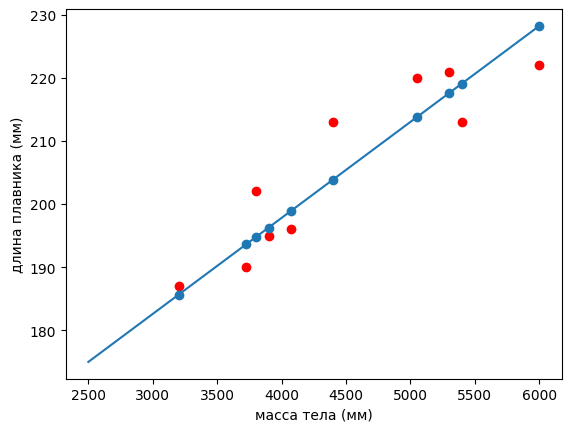

In [88]:
# визуализируем точки тестовой выборки
plt.scatter(X_test[:10], y_test[:10], c='r')

# визуализируем предсказания линейной регрессии
plt.scatter(X_test[:10], y_test_predicted[:10])

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Посчитаем метрики качества MAE и MSE для тренировочной и тестовой выборок. Мы будем использовать для этого функции из sklearn.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [90]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(5.663047203779439, 5.026356967930178)

In [91]:
np.mean(np.abs(y_train_predicted - y_train))

5.663047203779439

In [92]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(48.304889168287325, 36.87130582552346)

In [93]:
np.mean((y_train_predicted - y_train)**2)

48.304889168287325

## Задача 2. Предсказание длины плавника по массе тела и длине клюва

Посмотрим снова на наши данные:

In [25]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


Запишем в переменную Х признаки, по которым мы будем предсказывать ответ ('масса тела', 'длина клюва'), а в переменную y — целевую переменную ('длина плавника'):

In [26]:
X = data[['body_mass_g', 'culmen_length_mm']]
y = data['flipper_length_mm']

Также поделим данные на тренировочную и тестовую выборки:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные в виде точек в трехмерном пространстве. По оси ОХ отложим значение признака "масса тела", по оси OY — значение признака "длина клюва", по оси OZ — ответ, т.е. значение переменной "длина плавника".

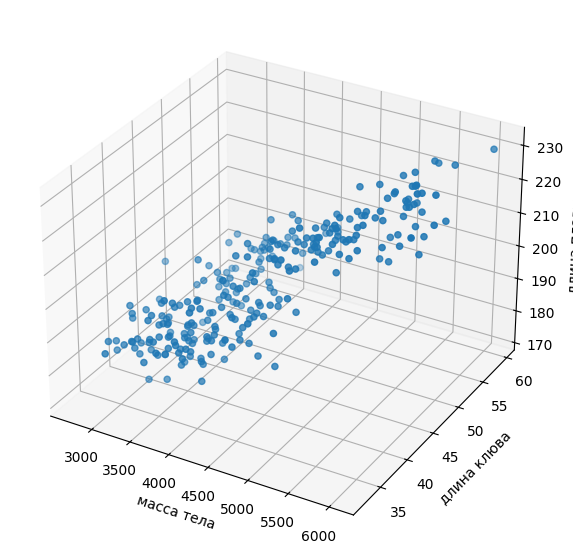

In [28]:
%matplotlib inline

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['body_mass_g']
y_points = X_train['culmen_length_mm']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Обучим модель линейной регрессии.

Здесь нам уже не нужно делать expand_dims для X_train, потому что он и так двумерный: в нем каждый элемент — это массив значений двух признаков.

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания:

In [30]:
y_train_predicted = lr.predict(X_train)

y_train_predicted

array([191.23197518, 216.09502023, 194.75718909, 185.67443546,
       186.99687258, 188.72502071, 211.09729244, 200.85835959,
       199.23170255, 192.72482105, 197.47924048, 212.7158589 ,
       223.9486528 , 178.90798   , 210.12372117, 198.6799812 ,
       184.90770163, 197.96598389, 223.01968525, 210.0952986 ,
       196.89913878, 192.25425879, 198.77329726, 201.05710646,
       223.84317976, 200.46891419, 209.82759183, 185.17545062,
       202.0631667 , 207.53560761, 200.87458296, 185.25254331,
       215.01597592, 217.83532533, 221.94064094, 209.54764364,
       190.75332234, 201.77517017, 208.9350952 , 208.7444389 ,
       207.60452527, 196.37173138, 183.63800102, 184.7373351 ,
       201.1098852 , 214.89834592, 182.8875328 , 203.53978921,
       203.11789706, 193.24811984, 193.24811984, 188.18952273,
       195.199371  , 209.73829994, 219.11315874, 211.45831527,
       222.16374398, 194.66798165, 193.39828104, 215.45002504,
       206.89866077, 191.06160865, 189.38623927, 186.62

Теперь визуализируем плоскость, которую задает регрессия. 

Выведем коэффициенты, которые модель поставила в соответствие признакам. 
- coef_ — это коэффициенты $k_1$ и $k_2$, соответствующие двум признакам в нашем датасете ("масса тела" и "длины клюва")
- intercept_ — это ксвободный член, коэффициент $k_0$

In [32]:
lr.coef_, lr.intercept_

(array([0.0133057 , 0.52736518]), 121.73790803531207)

Зададим уравнение плоскости, которую задает линейная регрессия:
$$y = k_1 \cdot (масса \ тела) + k_2 \cdot (длина \ клюва) + k_0$$

In [33]:
def f_plane(x1, x2):
    return lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

# то же самое можно было записать в виде lambda-функции:
# f_plane = lambda x1, x2: lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

Визуализируем плоскость, точки выборки и ответы линейной регрессии на точки выборки:

In [34]:
X_train['culmen_length_mm'].min(), X_train['culmen_length_mm'].max()

(32.1, 59.6)

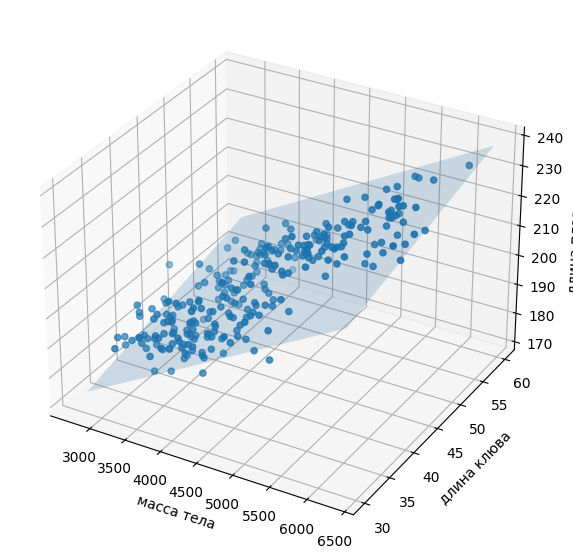

In [35]:
%matplotlib inline

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['body_mass_g']
y_points = X_train['culmen_length_mm']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

# визуализируем плоскость
x, y = np.meshgrid(range(2800, 6350), range(30, 61));
z = np.array([f_plane(point_x, point_y) for point_x, point_y in zip(x, y)]);
ax.plot_surface(x, y, z, alpha=0.2);

# раскомментируйте строчку ниже, чтобы визуализировать
# ответы линейной регрессии на плоскости
# ax.scatter(x_points, y_points, y_train_predicted, c='r');


ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Видим, что линейная регрессия неплохо описывает наши точки!

## Задача 3. Предсказание массы тела по всем остальным признакам

Наконец, давайте решим более сложную задачу: предсказние массы тела пингвина по остальным пяти его признакам из датасета.

In [42]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


Разделим данные на признаки и целевую переменную:

In [43]:
X = data.drop(columns=['body_mass_g'])
y = data['body_mass_g']

In [44]:
X.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0,2,39.1,18.7,181.0,1
1,0,2,39.5,17.4,186.0,0
2,0,2,40.3,18.0,195.0,0
4,0,2,36.7,19.3,193.0,0
5,0,2,39.3,20.6,190.0,1


Поделим данные на train и test:

In [49]:
X.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
sex                  0
dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [61]:
X_test.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,51.000000,51.000000,51.000000
mean,43.605882,17.190196,201.705882
std,5.101937,2.184239,14.404574
min,34.000000,13.100000,180.000000
25%,39.550000,15.650000,190.000000
50%,44.500000,17.200000,197.000000
75%,47.450000,18.700000,215.000000
max,52.200000,21.500000,230.000000


Обучим линейную регрессию на тренировочной части:

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания линейной регрессии на тренировочной и тестовой частях датасета:

In [62]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

ValueError: could not convert string to float: '.'

Посчитаем MAE и MSE

In [63]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(264.3557825169988, 4046.3509287265015)

In [64]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(103367.76445657865, 16887690.828508902)

### Оценка важности признаков линейной регрессии

Давайте еще раз посмотрим на наши признаки и на коэффициенты, которые линейная регрессия поставила в соответствие каждому из них:

In [40]:
X_train.head()

,body_mass_g,culmen_length_mm
22,3800.0,35.9
269,5300.0,45.2
36,3950.0,38.8
27,3200.0,40.5
4,3450.0,36.7
...,...,...
19,4200.0,46.0
155,3525.0,45.4
205,4050.0,50.7
190,2700.0,46.9


In [65]:
lr.coef_, lr.intercept_

(array([ 239.24503675, -105.21924331,  -20.38258915,  -40.1798807 ,
          32.4052665 ,  583.398311  ]),
 -1169.0695974778455)

In [66]:
for i, feature in enumerate(X_train.columns):
    print(feature, ' '*(19-len(feature)), '|  ', 'k_'+str(i+1), '  |  ', lr.coef_[i])


species              |   k_1   |   239.24503674654233
island               |   k_2   |   -105.21924331229937
culmen_length_mm     |   k_3   |   -20.382589154941947
culmen_depth_mm      |   k_4   |   -40.179880697511756
flipper_length_mm    |   k_5   |   32.405266495505444
sex                  |   k_6   |   583.3983109999264


Модули значений коэффициентов линейной регрессии отражают важности признаков. т.е. насколько важную роль признак играет в получении ответа моделью линейной регрессии.

Однако нельзя считать, что чем больше модуль коэффициента при признаке, тем больше его важность. Вот почему:

Уравнение линейной регрессии в данном случае имеет вид:

$$ y = k_5x_5 + k_4x_4 + k_3x_3 + k_2x_2 + k_1x_1 + k_0$$

Посмотрим на признаки "вид" ($k_1$) и "длина плавника" ($k_5$) и на коэффициенты, которые им соответствуют. 

Может показаться, что, раз коэффицент для признака $k_1$ больше по модулю, чем для признака $k_5$, то признак $k_1$ играет бОльшую роль в предсказании массы тела, чем признак $k_5$. Однако это не так. Посмотрим на то, а каких границах варьируются значения признаков $k_1$ и $k_5$:
- у $k_1$ всего 3 варианта значения: 0, 1 и 2. Поэтому значение $k_1x_1$ будет варьироваться от 0 до примерно 300-600
- у $k_5$ много вариантов значений, но все они лежат в диапазоне [174, 230]. Поэтому значение $k_5x_5$ будет лежать в диапазоне $\sim $ [6500, 900]

Получается, для любого элемента датасета значение $k_5x_5$ больше, чем $k_1x_1$. Более того, изменение значения признака $k_1$ меняет значение $k_1x_1$ где-то на 250, а изменение значения признака $k_5$ может менять значение $k_5x_5$ на 1000 или больше. 

Получается, величина $k_5x_5$ может сильнее изменять ответ, чем величина $k_1x_1$ и значение признака $k_5$ сильнее влияет на итоговый ответ, чем значение признака $k_1$. 

Иными словами, масса тела пингвина сильнее связана с длиной плавника пингвина, чем с видом пингвина.

In [67]:
X_train['длина плавника'].min(), X_train['длина плавника'].max()

KeyError: 'длина плавника'

### Сравнение линейной регрессии и KNN

В заключение давайте сравним качества моделей линейной регрессии и алгоритма k ближайших соседей на нашей задаче предсказания массы тела пингвина по другим его характеристикам.

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
knn = KNeighborsRegressor(n_neighbors=5)

In [70]:
knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

ValueError: could not convert string to float: '.'

In [38]:
y_train_predicted_lr = lr.predict(X_train)
y_test_predicted_lr = lr.predict(X_test)

MAE и MSE на train выборке для KNN:

In [39]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(214.1696113074205, 74243.28621908127)

MAE на и MSE train выборке для LR:

In [40]:
mean_absolute_error(y_train_predicted_lr, y_train), mean_squared_error(y_train_predicted_lr, y_train)

(256.1488692352941, 99417.8916999486)

MAE и MSE на test выборке для KNN:

In [41]:
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(298.9, 148610.5)

MAE и MSE на test выборке для LR:

In [42]:
mean_absolute_error(y_test_predicted_lr, y_test), mean_squared_error(y_test_predicted_lr, y_test)

(313.237345728802, 146062.61649191263)

Видим, что результаты работы алгоритмов разные, но отличаются не сильно. О том, как при решении задачи выбрать лучшую модель, вы узнаете на следующих занятиях.